# Introduction

For our next milestone in this project, we have set a few goals. First we needed a good dataset that contains users and ratings those users gave for specific recipes in our dataset. While searching for a good source of data for our project, we have discovered yummly dataset on recipes at http://lherranz.org/datasets/. Later in our analysis we have discovered that this dataset contained some duplicate values, so after removing them we had a total of 27322 recipes. 

Each of these recipes contains valuable information about ingredients, cuisine, type of course the recipe is assigned to, flavors and so on. But still, for the recommendation part of our assignement, we needed some users and their opinions on different recipes, therefore the ratings they gave for a specific recipe. In order to collect that information, we performed web scraping of https://www.yummly.com/ website, and collected 4828 reviews from 2351 users. 

After collecting data, we were able to build a simple recommender system that would allow our user to get recommendations of recipes that he would most likely grade with a highest score. However, our goal is to create a recommender system that would as well allow user to enjoy the possibility of creating a complete healthy daily menu with three meals corresponding to different dish course categories. In this part of our project we concetrated on building the simple recommender. For the next milestone we plan to enrich our recommendations by using additiona features like cuisine type, set of ingredients, preparation time, so that we could provide a more sophisticated menu that would be considered healthy for our user. 

In order to achieve this, we would need some definition of a healthy menu. Here we have considered the proposed nutritional requirements recommended by FDA. Based on this, a healthy menu for an adult person consists of meals that fill the 2000kcal daily goal. And not only that, the number and portions of proteins, fat and carbs should be well distributed, together with the number of vitamins and minerals consumed. 

In order to allow our user to actually see the success of our proposed menu to achieve these values, we have performed visualization on nutritional values of recipes. He will in this way have the information about the percentage of nutrients in his diet compared to proposed daily values. For the next milestone, we would like to enable user to set his own requirements on daily number of calories, amount of proteins, carbs and so on, as the 2000kcal per day diet has been shown insufficient for an active adult person in modern world.

Now, cooking is not only about aiming to fulfill some proposed values in order to be healthy. Beside that, it's usually fun. So in order to make cooking and commiting to the proposed menu more interesting we will add a 'Did you know?' section. With every proposed meal, we could inform our user about the cuisine that meal comes from, but not only that, we could allow him to explore different similar cuisines, in order to find more favourite meals. Also, as each recipe comes with a set of ingredients, we will let our user know about the ingredients he is about to consume. We can even find a connection between cusine and the most common ingredients in that cuisine which all provide nice overview of our dataset and our user's preferences.  

In [170]:
import requests
import os
import sys
import pandas as pd
import numpy as np
import json
import re
import shutil
from tqdm import tqdm
import glob
import csv
import matplotlib as plt
import pprint
%matplotlib inline
import warnings
import folium
warnings.filterwarnings("ignore")

In [2]:
directory = '/Users/bojanarankovic/Documents/ada/project/yummly_scraper/Yummly28K/done/'
root = '/Users/bojanarankovic/Documents/ada/project/yummly_scraper/Yummly28K/'
done = '/Users/bojanarankovic/Documents/ada/project/yummly_scraper/Yummly28K/done/'

# Example data

Our first dataset on recipes comes from http://lherranz.org/datasets/ and containes 27638 json files that we explored.

# Scraping data

We have used the 'url' json attribute of each recipe and on that page we have found the reviews for that recipe. Using the requests, we managed to collect all elements needed so that we could obtain data on users and ratings they left for that specific recipe. This was collected in a json format, which we later converted to csv.

In [ ]:
directory = os.fsencode('/Users/bojanarankovic/Documents/ada/project/yummly_scraper/Yummly28K/metadata27638/')
root = os.fsencode('/Users/bojanarankovic/Documents/ada/project/yummly_scraper/Yummly28K/')
done = '/Users/bojanarankovic/Documents/ada/project/yummly_scraper/Yummly28K/done/'
recipe_file = open('reviews.json', 'a')
users_ratings = {}
counter = 0
for file in os.listdir(directory):
    
    filename = os.fsdecode(os.path.join(directory, file))
    counter+=1
    try:
        with open(filename) as json_data:
            d = json.load(json_data)
            URL = d['attribution']['url']
            recipe_id = d['id']
            
            r = requests.get(URL)
            soup = BeautifulSoup(r.content, 'html.parser')
            
            elements = soup.find_all(class_="review")
            
            for el in elements[1:]:
                
                try:
                    
                    user_url ='https://www.yummly.com' + str(el.select(".review-name a")[0].attrs["href"])
                    user = user_url[user_url.rfind('/')+1:]
                    rating = len(el.select(".review-rating .full-star")) + 0.5 * len(el.select(".review-rating .half-star"))
                    recipe_file.write('{{"user":"{}", "recipe_id":"{}", "rating":{},"user_url":"{}"}},\n'.format(user,recipe_id,rating,user_url))
                    
                except AttributeError as err:
                    user = 'np.nan'
                    user_url = 'np.nan'
                    rating = 'np.nan'
                    review = 'np.nan'
        print(filename)
        shutil.move(filename, done)
    except:
        print(str.format("Error occured: {}",sys.exc_info()))
        invalid_json_files.write(filename+'/n')



# Reading data

After our dataset has been collected by scraping the yummly website, we have obtained multiple json files on recipes. By analyzing the data, we have observed that each json file provides wide range of information we could use, but we need to restrict our selection to data that would be essential for this project. So when building the csv with only relevant information on recipes we have extracted types of course, cuisine, time and list of ingredients for each recipe, as the needed information for our analysis. This has been saved into csv files which are used for the rest of the project. Even though there are several attributes describing preparation time of recipe we have chosen the one given in seconds, because it's the most consistent in the dataset, unlike the other values that could sometime be in minutes and sometimes hours and minutes, and so on. 
    
For extracting information on nutritional values for recipes, we have used flatten_json because the data on nutrients comes in a shape of a dictionary of dictionaries as each unit has its own additional values.

In [171]:
recipes = pd.read_csv('data/recipes.csv', index_col='recipe_id')


In [172]:
recipes.shape

(33872, 5)

In [206]:
a = recipes[1000:1100]

In [207]:
display(a)

,name,totalTime,course,cuisine,ingredients
recipe_id,,,,,
Arugula-and-Goat-Cheese-Ravioli-Epicurious-53032,Arugula and Goat Cheese Ravioli,9000.0,Main Dishes,Italian,"['2 cups cake flour (not self-rising)', '1/2 c..."
Arugula-and-Radish-Salad-Martha-Stewart,Arugula and Radish Salad,600.0,Salads,American,"['1 teaspoon Dijon mustard', '2 tablespoons fr..."
Arugula-And-Ricotta-Calzones-Epicurious,Arugula and Ricotta Calzones,2700.0,Main Dishes,Italian,"['1 large garlic clove, minced', '2 tablespoon..."
Arugula-and-Roasted-Vegetable-Salad-With-Whole-Grain-Croutons-Martha-Stewart-191353,Arugula and Roasted-Vegetable Salad With Whole...,2700.0,Salads,American,"['olive oil, cooking spray', '2 slices (1/2 in..."
Arugula-And-Watermelon-Salad-Allrecipes,Arugula and Watermelon Salad,1200.0,Salads,American,"['2 (5 ounce) packages arugula', '1/2 large wa..."
Arugula-Parmesan-Salad-with-Simple-Lemon-Vinaigrette-1667596,Arugula Parmesan Salad with Simple Lemon Vinai...,600.0,Salads,NaN,"['4 cups baby arugula (loosely packed)', '⅔ cu..."
Arugula-Pesto-376167,Arugula Pesto,900.0,Main Dishes,Italian,"['2 (6-8 inch) tortillas', '2 tablespoons gorg..."
Arugula-Pesto-Martha-Stewart,Arugula Pesto,1200.0,Condiments and Sauces,American,"['1 large bunch arugula (about 1 packed cup), ..."
Arugula-Pesto-Pizza-with-Herbed-Ricotta-1176890,Arugula Pesto Pizza with Herbed Ricotta,2520.0,Main Dishes,Italian,"['1 ball pizza dough', '1 batch arugula pesto'..."


In [23]:
recipes.index.is_unique

True

# Cuisine similarity analysis

For this part we will be using the dataset on recipes, **recipes.csv**. In order to discover cuisine similarities we will need to explore the ingredients of each recipe and try to connect them with different cuisines. The dificulty we will have to face in this part of the project is the format of ingredients given in our dataset. There are a lot of specific stopwords for recipes like measures and the description of ingredients like dry, trim, mixed, so we will need to deal with them approprietly to have the correct calculations per cuisine. 

## Exploring the data

We've already discovered there are some duplicates in our dataset that came from the original Yummly28k dataset, so in order to clean it we will have to drop duplicates.

In [999]:
recipes.head()

,name,totalTime,course,cuisine,ingredients
recipe_id,,,,,
--Naan_-Boiled-rice-1362073,"- Naan, Boiled rice",4800.0,Main Dishes,Indian,"['100 gms paneer/cottage cheese, grated', '2 m..."
-Spicy-Spaghetti-and-Meatballs-1055356,Spicy Spaghetti and Meatballs,3300.0,Main Dishes,Italian,"['Spicy Tomato Sauce', '1 tbsp olive oil', '1 ..."
1-2-3-Jambalaya-514797,1-2-3 Jambalaya,1800.0,Main Dishes,Cajun & Creole,['1 package (13.5 ounces) Johnsonville® Andoui...
1-Dish-Italian-Meatball-and-Cheese-Pizza-Bake-with-Green-and-Red-Peppers-1266330,1 Dish Italian Meatball and Cheese Pizza Bake ...,3000.0,Main Dishes,Italian,"['Cooking Spray', '1-3/4 cups all-purpose flou..."
1-Hour-Vegan-Pot-Pies-747113,1-Hour Vegan Pot Pies,3600.0,NaN,NaN,['3/4 cup chopped yellow onion (~ 1/2 medium o...


Our data is mainly in string format, except of the totalTime column that has numerical values. Let's check if there are any null values.

In [24]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33872 entries, --Naan_-Boiled-rice-1362073 to Zuppa-di-Pesce-_Italian-Fish-_-Seafood-Stew_-1048784
Data columns (total 5 columns):
name           33872 non-null object
totalTime      30102 non-null float64
course         33550 non-null object
cuisine        29529 non-null object
ingredients    33872 non-null object
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


In [25]:
recipes.isnull().sum()

name              0
totalTime      3770
course          322
cuisine        4343
ingredients       0
dtype: int64

We observe that there are some null values in the totalTime, course and cuisine columns. This could be because some of the recipes don't provide the estimated preparation time, or the cuisine isn't constrained to one type. Let's explore it even further.

In [1003]:
recipes['totalTime'].max()

1440600.0

Here we can observe that the most demanding recipe takes more 10 that days to make. :D We were really interested to discover the most time consuming recipe, and we have also extracted its 'url' from json file, so indeed as mentioned on yummly site https://www.yummly.com/recipe/Honey-Mustard-Slow-Cooker-Chicken-2221106, this recipe will take you two weeks to make. But when reading through directions it is clear that this is a mistake, so we should be carefull when analyzing data in our dataset. 

In [27]:
recipes[recipes['totalTime']==recipes['totalTime'].max()]

,name,totalTime,course,cuisine,ingredients
recipe_id,,,,,
Honey-Mustard-Slow-Cooker-Chicken-2221106,Honey Mustard Slow Cooker Chicken,1440600.0,Main Dishes,NaN,['1 package PERDUE® FRESH CUTS™ Chicken Breast...


On the other hand, we observe some recipes that require only few minutes to make, so this will come in handy when trying to come up with a menu for modern busy people that don't have so much time to cook. 

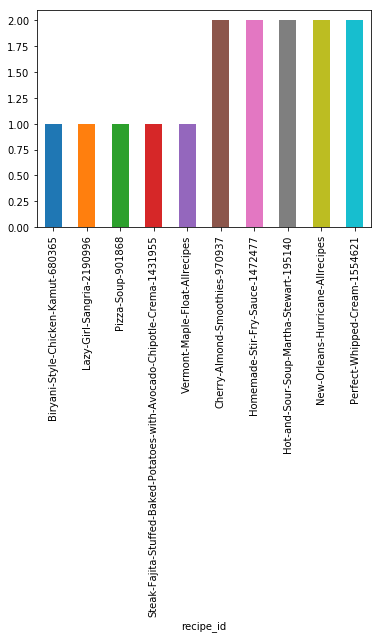

In [33]:
np.divide(recipes['totalTime'],60).nsmallest(10).plot(kind='bar')


Let's explore the cuisine column of our dataset.

In [34]:
train_data = recipes[['cuisine','ingredients']].dropna(axis=0)

cuisine_names = np.sort(train_data['cuisine'].unique())
cuisine_names

array(['American', 'Asian', 'Barbecue', 'Brazilian', 'Cajun & Creole',
       'Chinese', 'Cuban', 'English', 'Filipino', 'French', 'German',
       'Greek', 'Hawaiian', 'Hungarian', 'Indian', 'Irish', 'Italian',
       'Jamaican', 'Japanese', 'Kid-Friendly', 'Korean', 'Mediterranean',
       'Mexican', 'Moroccan', 'Portuguese', 'Russian',
       'Southern & Soul Food', 'Southwestern', 'Spanish', 'Swedish',
       'Thai', 'Turkish', 'Vietnamese'], dtype=object)

In [35]:
train_data['cuisine'].describe()

count        29529
unique          33
top       American
freq         11677
Name: cuisine, dtype: object

Here, we see that we have 33 different cuisine types, and the most frequent one is American with 11677 recipes. Let's see the statistics on the rest of them.

In [40]:
train_data['cuisine'].value_counts(normalize=True,sort=True)[:10]

American         0.439878
Italian          0.180027
Mexican          0.134031
Asian            0.076094
French           0.059331
Indian           0.057899
Thai             0.016274
Chinese          0.014767
Mediterranean    0.005048
Greek            0.003503
Name: cuisine, dtype: float64

Here we observe that the given train dataset is higly skewed, with a majority of American, Italian and Mexican recipes. We also observed some types of cuisines that are not national cuisines. We want to remove those values in our training data so that we could perform analysis based on different national cuisines around the world.

In [41]:
train_data = train_data[~train_data['cuisine'].isin(['Barbecue','Kid-Friendly','Southern & Soul Food','Cajun & Creole','Southwestern'])]


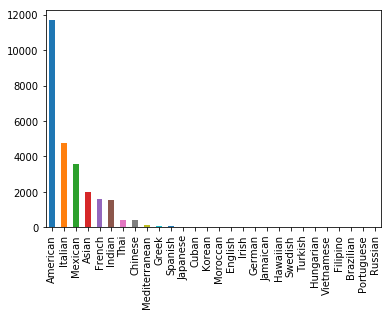

In [42]:
train_data['cuisine'].value_counts().plot(kind='bar')


Let’s now take a closer look at the ingredients. We observe the list of ingredients strings which we will have to clean to get a more suitable shape. 

In [43]:
recipes['ingredients'].head(5)

recipe_id
--Naan_-Boiled-rice-1362073                                                         ['100 gms paneer/cottage cheese, grated', '2 m...
-Spicy-Spaghetti-and-Meatballs-1055356                                              ['Spicy Tomato Sauce', '1 tbsp olive oil', '1 ...
1-2-3-Jambalaya-514797                                                              ['1 package (13.5 ounces) Johnsonville® Andoui...
1-Dish-Italian-Meatball-and-Cheese-Pizza-Bake-with-Green-and-Red-Peppers-1266330    ['Cooking Spray', '1-3/4 cups all-purpose flou...
1-Hour-Vegan-Pot-Pies-747113                                                        ['3/4 cup chopped yellow onion (~ 1/2 medium o...
Name: ingredients, dtype: object

Since our ingredients columns is a string representation of list of ingredients, by returning the lenght of that list we get the number of ingredients per recipe. 

In [44]:
import ast
recipes['ingredients'].apply(lambda x: len(ast.literal_eval(x))).describe()

count    33872.000000
mean        11.435286
std          5.338806
min          1.000000
25%          8.000000
50%         11.000000
75%         14.000000
max        123.000000
Name: ingredients, dtype: float64

In [45]:
recipes['course'].unique()

array(['Main Dishes', nan, 'Beverages', 'Condiments and Sauces', 'Soups',
       'Lunch and Snacks', 'Salads', 'Appetizers', 'Lunch', 'Side Dishes',
       'Desserts', 'Breakfast and Brunch', 'Snacks', 'Breads', 'Cocktails',
       'Afternoon Tea'], dtype=object)

In [46]:
recipes['course'].str.contains('Breakfast and Brunch').sum()


885

In [47]:
recipes['course'].value_counts(sort=True)

Main Dishes              16272
Desserts                  3937
Side Dishes               2810
Salads                    2677
Soups                     2241
Appetizers                1645
Condiments and Sauces      908
Breakfast and Brunch       885
Lunch and Snacks           637
Breads                     614
Beverages                  351
Lunch                      295
Snacks                     134
Cocktails                  128
Afternoon Tea               16
Name: course, dtype: int64

Here we can observe that the most common dish in our dataset is the main dish. We also have information about dishes that belong to breakfast category. When creating a menu, we can balance different types of dishes to create a menu that has reasonable distribution of nutritions through out the day.

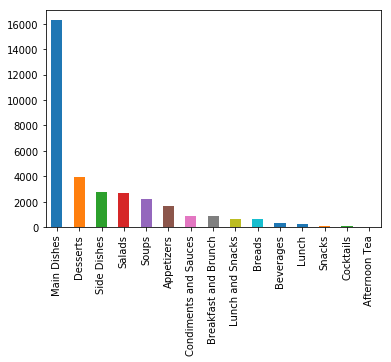

In [48]:
recipes['course'].value_counts().plot(kind='bar')


We can find how many recipes contain certain ingredient. This will help us for the next part of the project, when we want to recommend recipes according to different ingredients they have. 

In [49]:
recipes['ingredients'].str.contains('[Pp]aprika').sum()


1693

We can even take out the recipe that contains a list of recipes, so our user can choose multiple ingredients and expect a meal that would suit that selection.

In [50]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
                      'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [51]:
import re
spice_df = pd.DataFrame(
           dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                                                        for spice in spice_list))
spice_df.head(10)


,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
recipe_id,,,,,,,,,,
--Naan_-Boiled-rice-1362073,False,False,False,False,False,False,False,True,False,False
-Spicy-Spaghetti-and-Meatballs-1055356,False,False,False,True,True,False,False,True,False,False
1-2-3-Jambalaya-514797,False,False,False,True,True,False,True,False,False,False
1-Dish-Italian-Meatball-and-Cheese-Pizza-Bake-with-Green-and-Red-Peppers-1266330,False,False,False,False,False,False,False,True,False,False
1-Hour-Vegan-Pot-Pies-747113,False,False,False,False,True,False,False,True,False,False
1-Hour-Vegan-Shepherd_s-Pie-1433748,False,False,False,False,True,False,False,False,False,True
1-Week-of-Green-Smoothie-Prep-Packs-2077993,False,False,False,False,False,False,False,False,False,False
10-Layer-Taco-Salad-1278093,False,False,False,False,False,False,False,False,False,False
10-minute-arrabbiata-sauce-299924,False,False,False,False,True,False,False,False,False,False


In [52]:
selection = spice_df.query('parsley & paprika & tarragon')
selection


,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
recipe_id,,,,,,,,,,
Bouillabaisse-Martha-Stewart-193677,True,False,True,True,True,False,False,True,True,False
Bouillabaisse-Martha-Stewart-197529,True,False,True,True,True,False,False,True,True,False
Buttermilk-Fried-Chicken-Simply-Recipes-43147,False,False,True,True,True,False,False,True,True,True
Nicoise-Eggs-628216,True,False,True,True,True,False,False,True,True,False
Smoked-Bluefish-Rillettes-513902,False,False,True,True,False,False,False,True,True,True


We found all the recipes that contained our preferable ingredients.

In [53]:
recipes['name'][selection.index]

recipe_id
Bouillabaisse-Martha-Stewart-193677                          Bouillabaisse
Bouillabaisse-Martha-Stewart-197529                          Bouillabaisse
Buttermilk-Fried-Chicken-Simply-Recipes-43147     Buttermilk Fried Chicken
Nicoise-Eggs-628216                                           Nicoise Eggs
Smoked-Bluefish-Rillettes-513902                 Smoked Bluefish Rillettes
Name: name, dtype: object

## Cleaning data for cuisine similarity analysis 

In the next part of the project, our goal is to discover the similarity between different cuisines based on the ingredients used for the recipes. This part is mainly focused on textual analysis as the ingredients come in shape of list of strings. In order to get a clear view on recipes and ingredients we need to clean the data by removing numbers, and special stopwords used in kitchen, like measure units and the description of ingredients. 

In [54]:
import nltk

In [55]:
display(train_data['ingredients'].head(5))

recipe_id
--Naan_-Boiled-rice-1362073                                                         ['100 gms paneer/cottage cheese, grated', '2 m...
-Spicy-Spaghetti-and-Meatballs-1055356                                              ['Spicy Tomato Sauce', '1 tbsp olive oil', '1 ...
1-Dish-Italian-Meatball-and-Cheese-Pizza-Bake-with-Green-and-Red-Peppers-1266330    ['Cooking Spray', '1-3/4 cups all-purpose flou...
10-Layer-Taco-Salad-1278093                                                         ['4 cups shredded iceberg lettuce OR other cri...
10-minute-arrabbiata-sauce-299924                                                   ['2 Tbsp. Bertolli® Classico™ Olive Oil', '1 T...
Name: ingredients, dtype: object

In [244]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from collections import defaultdict
stemmer = WordNetLemmatizer()
import re

stem_original_dic = {}
def clean_recipe(recipe):
    # To lowercase
    recipe = recipe.lower()
    
    def replacing(recipe):
        recipe = recipe.replace('&', '').replace('(', '').replace(')','').replace("*",'').replace('~','')
        recipe = recipe.replace('\'', '').replace('\\', '').replace(',','').replace('{','')
        recipe = recipe.replace('.', '').replace('%', '').replace('/','').replace('!','')
        recipe = recipe.replace('"', '').replace('[','').replace(']','').replace('?','')
        recipe = recipe.replace('-','').replace(';','').replace(':','').replace('}','')
        sep = 'garnishes' 
        recipe = re.sub(sep, '', recipe)
        return recipe

    # Replacing characters
    recipe = replacing(recipe)

    # Remove digits
    def test(recipe):
        return re.sub("\d+", "", recipe)
    recipe = [test(word) for word in recipe.split(' ')]

    # Filter empty words
    recipe = list(filter(None,recipe))

    # Remove stop words
    cachedStopWords = set(nltk.corpus.stopwords.words("english"))
    
    #Stem ingredients and save original ingredient name
    for ingredient in recipe:
        stem_original_dic[stemmer.lemmatize(ingredient)] = ingredient
    recipe = [stemmer.lemmatize(ingredient) for ingredient in recipe]

    #add custom words
    cachedStopWords.update(('cup','tablespoon','pound','ounce',
                            'unpeeled','juice','fresh','chopped','rinsed','teaspoon','teaspoons','large','green',
                           'peeled','halved','thawed','scraped','mixed','whole','medium','softened', 'divided',
                            'loosely', 'packed','drained', 'flaked', 'hot', 'cooked','grated','white','sliced',
                            'g','cut','ground','preferably','pounds','centercut','silver','skin', 'trimmed','finely',
                            'stick', 'unsalted','oz','ounces','freshly','black','½','¼','dry','plus','tsp','tbsp','inch',
                            'red','minced','taste','leaves','powder','seeds','diced','sour','lb','coarse','italian','shredded',
                           'dried','sauce','small','crushed','cup','cups','tablespoon','tablespoons','pound','ounce',
                            'unpeeled','juice','fresh','chopped','rinsed','teaspoon','teaspoons','large','green',
                           'peeled','halved','thawed','scraped','mixed','whole','medium','softened', 'divided',
                            'loosely', 'packed','drained', 'flaked', 'hot', 'cooked','grated','white','sliced',
                            'g','cut','ground','preferably','pounds','centercut','silver','skin', 'trimmed','finely',
                            'stick', 'unsalted','oz','ounces','freshly','black','½','¼','dry','plus','tsp','tbsp','inch',
                            'red','minced','taste','leaves','powder','seeds','diced','sour','lb','coarse','italian','shredded',
                           'dried','sauce','small','crushed','httpwwwgimmesomeovencommarinarasaucerecipe','package',
                           'roughlychopped','jar','homemade','storebought','noboil','may','use','entire','container',
                           'freshlygrated','deveined','thinly','cored','seeded','extravirgin','pitted','almost','do––even',
                           'vegetable','handful','dark','cubed','crumbed','english','crumbled','stem','removed','canned',
                           'extra','virgin','vacuumpacked','ozg','httpwwwgimmesomeovencomredenchiladasauce','undrained',
                            'petite','stewed','rom','san','puree','shell','matchsticked','diagonally','part',
                            'soft','brown','additional','package','breast','bite','sized','cube','low','sodium',
                            'light','hoisin','raw','garnish','boneless','skinless','strip','pinch','serving',
                            'bunch','spring','add','heat','optional','oven','roasted','used','brand','excess','like',
                            'c','taste*','⅓','pressed','press','piece','sundried','needed','goldn','favorite','half',
                            'lean','plain','breadcrumb','yellow','lowsodium','tough','bitesized','room','temperature',
                            'unsweetened','generous','sea','roughly','tb','several','dash','worcestershire',
                            'good','stock','boil','salty','shred','size','$','mild','powder*','¾','precooked','great',
                            'liquid','northern','reserved','chunk','bay','swiss','shape','strongly','recommend','using'
                            ,'“spicy”','xacups','fat','frozen','uncooked','spicy','sweet','lb','two','combination',
                          'flat','erythritol','swanson','lb','rotisserie','swanson','andor','lb','chopping','desired',
                            'leaf','ditto','little','fine','mexican','depending','oz}','reduced','fire','according',
                            'diameter','juiced','summer','snipped','mediumsized','tbls','jumbo','long','old','chunk','box','thin', 'purchased',
                            'kick','quarter','per','med','smoked','greek','fried','ring','blackeyed','regular','added','four','blade',
                            'much','pounded','eastern','ï¿½', 'typically','kick!','would','layering','dairy','pace', 'deepfat','deepfat',
                            'big','can','want','prechopped','pull','bottled','mister','leave', 'nosalt','lbs','rough','fingertip','petit',
                            'spici','combin','link','ear','leav','increas','tast','file','case', 'crack','depend','bowtie','dinosaur',
                           'vegetarian','x'))

    #remove stop words
    #recipe = [word for word in recipe if word.strip() not in cachedStopWords]
    recipe = set(recipe)-cachedStopWords

    #Stem ingredients
    #recipe = [stemmer.lemmatize(ingredient) for ingredient in recipe]

    return list(recipe)


train_data['ingredients_clean'] = train_data['ingredients'].apply(lambda x: clean_recipe(x))





In [60]:
stem_original_dic


{'gm': 'gms',
 'paneercottage': 'paneercottage',
 'cheese': 'cheese',
 'grated': 'grated',
 'medium': 'medium',
 'size': 'size',
 'potato': 'potatoes',
 'boiled': 'boiled',
 'peeled': 'peeled',
 'and': 'and',
 '¼': '¼',
 'tsp': 'tsp',
 'red': 'red',
 'chili': 'chili',
 'powder': 'powder',
 'tbsp': 'tbsp',
 'cornflour': 'cornflour',
 'a': 'a',
 'pinch': 'pinches',
 'or': 'or',
 'garam': 'garam',
 'masala': 'masala',
 'milk': 'milk',
 'salt': 'salt',
 'required': 'required',
 'oil': 'oil',
 'for': 'for',
 'shallow': 'shallow',
 'deep': 'deep',
 'frying': 'frying',
 'the': 'the',
 'koftas': 'koftas',
 'sized': 'sized',
 'onion': 'onion',
 '½': '½',
 'inch': 'inch',
 'ginger': 'ginger',
 'piece': 'pieces',
 'chopped': 'chopped',
 'garlic': 'garlic',
 'clove': 'cloves',
 'roughly': 'roughly',
 'cup': 'cups',
 'tomato': 'tomatoes',
 'puree': 'puree',
 'cashew': 'cashews',
 'paste': 'paste',
 '¾': '¾',
 'turmeric': 'turmeric',
 'water': 'water',
 'fresh': 'fresh',
 'cream': 'cream',
 'full': 

We define a function that returns the frequencies of ingredients used in a specific cuisine. For faster results we use the Counter() object from nltk package. This function will give us an overview of $n$ most common ingredients used in a cuisine by default, and in case we want to see all the ingredients and its frequencies we can use the parameter $full$.

In [61]:
def most_common_ingredients(cuisine_type, n=10, full=False):
    c = Counter()
    for word in train_data[train_data['cuisine']==cuisine_type]['ingredients_clean']:
        c.update(word)
    if full == True:
        return c.most_common()
    else:
        return c.most_common(n)


In [210]:
most_common_ingredients('Indian')

[('salt', 1287),
 ('oil', 1169),
 ('onion', 1158),
 ('garlic', 1149),
 ('ginger', 1135),
 ('clove', 986),
 ('cumin', 974),
 ('tomato', 852),
 ('turmeric', 843),
 ('coriander', 838)]

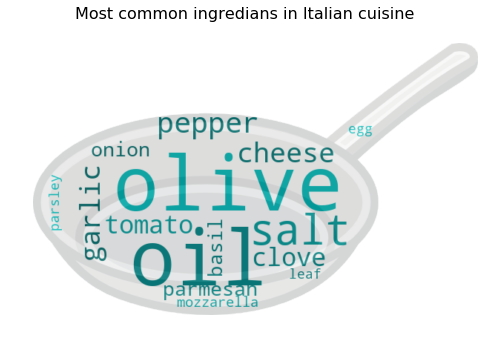

In [63]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

def plot_ingredients_cloud(figure, cuisine):
    pan_mask = np.array(Image.open(os.path.join('data','pan.png')))
    def color_func(word, font_size, position, orientation, random_state=None,
                        **kwargs):
        return "hsl(180, 100%%, %d%%)" % random.randint(20, 40)

    lots = most_common_ingredients(cuisine,full=True)
    wc = WordCloud(background_color="white", color_func=color_func, max_words=15, mask=pan_mask)

    # generate word cloud
    wc.generate_from_frequencies(frequencies=dict(lots))

    # show
    fig.suptitle(str.format("Most common ingredians in {} cuisine",cuisine), fontsize=16)

    plt.imshow(wc, interpolation="bilinear",alpha=1)
    plt.axis("off")
    plt.imshow(pan_mask, cmap=plt.cm.gray, interpolation='bilinear',alpha=0.2)
    plt.axis("off")
    plt.show()

fig = plt.figure(figsize=(12, 5))

plot_ingredients_cloud(fig,'Italian')


Our WordCloud containes most common ingredients for a specific cuisine. It is an interesting overview of our dataset.

In order to find the most similar cuisine, we will take the data on ingredients, and the number of their occurencies in each cuisince, and we will use this as a vector for calculating cosine similarity. 

In [64]:

import math
def cosine_sim(a, b):
    mutual = set(a).intersection(set(b))
    a_serie= pd.Series(list(set(a).intersection(mutual)))
    b_serie= pd.Series(list(set(b).intersection(mutual)))
    return 1 - cosine(a_serie, b_serie)

def cosine_distance(ingredient_freq1,ingredient_freq2):
        sumxx, sumxy, sumyy = 0, 0, 0
        commonIngredient = False
        for key in ingredient_freq1:
            if key in ingredient_freq2:
                x = ingredient_freq1[key]
                y = ingredient_freq2[key]
                sumxx += x*x
                sumyy += y*y
                sumxy += x*y
                commonIngredient = True
        if commonIngredient: return sumxy/math.sqrt(sumxx*sumyy)
        else: return 0

def cuisine_similarity(cusine_a, cuisine_b):
    d1 = dict(most_common_ingredients(cusine_a,full=True))
    d2 = dict(most_common_ingredients(cuisine_b,full=True))
    return cosine_distance(d1,d2)


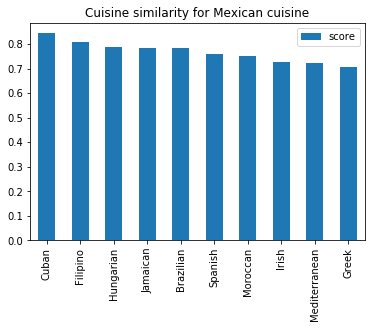

In [103]:
def cuisine_similarity_scores(cuisine_to_compare, for_plot = True):
    similarity_scores = {}
    cuisines = list(train_data['cuisine'].unique())
    if for_plot:
        cuisines.remove(cuisine_to_compare) 
    for cuisine in cuisines:
        similarity_scores.update({cuisine:cuisine_similarity(cuisine_to_compare,cuisine)})
    return similarity_scores

def plot_cuisine_similarities(cuisine):
    
    dataframe = pd.DataFrame.from_dict(cuisine_similarity_scores(cuisine), orient='index')
    dataframe.columns = ['score']
    dataframe.nlargest(10,'score').plot(kind='bar',title = str.format('Cuisine similarity for {} cuisine',cuisine))
    plt.show()

plot_cuisine_similarities('Mexican')

These are the 10 closest cuisines to Mexican. In fact, we could agree that we would expect a similar plot, so the cosine similarity gives a nice interpretation of our data on recipes and cuisines. Now, we could use these scores to map these similarities onto a world map. For this, we will use folium maps, and convert names of cuisines to names of the countries. There are some cuisine types that belong to a region, like Asian and Mediterranean, so for better visualization we will asign this type of cuisine to countries belonging to that region. 

In [82]:
cuisine2region = {
    'American': 'United States of America', 
    'Italian':'Italy',
    'Greek': 'Greece',
    'Mexican': 'Mexico',
    'Thai': 'Thailand',
    'Chinese': 'China',
    'Indian': 'India',
    'English': 'United Kingdom',
    'Korean': 'South Korea',
    'French': 'France',
    'Vietnamese': 'Vietnam',
    'Hawaiian': 'Hawaii',
    'Brazilian': 'Brazil',
    'Filipino': 'Philippines',
    'Hungarian': 'Hungary',
    'Japanese': 'Japan',
    'Turkish': 'Turkey',
    'Spanish': 'Spain',
    'Russian': 'Russia',
    'Irish': 'Ireland',
    'Swedish': 'Sweden',
    'Moroccan': 'Morocco',
    'Cuban': 'Cuba',
    'Jamaican': 'Jamaica',
    'German': 'Germany',
    'Portuguese': 'Portugal',

}
region_cuisine_countries = {'Asian':['Kyrgyzstan','Kazakhstan','Tajikistan','Turkmenistan','Afghanistan','Uzbekistan','Mongolia'],
                        'Mediterranean':['Monaco', 'Malta','Slovenia','Croatia','Bosnia and Herzegovina','Montenegro',
                            'Albania', 'Syria','Cyprus', 'Lebanon', 'Egypt', 'Libya', 'Tunisia','Algeria']}


In [85]:
def similarities_for_map(cuisine):
    similarities = cuisine_similarity_scores(cuisine, for_plot=False)
    pd_similarities = pd.DataFrame.from_dict(similarities, orient='index', dtype=None)
    pd_similarities = pd_similarities.reset_index()
    pd_similarities.columns=['cuisine type', 'score']
    pd_similarities['cuisine type'].update(pd_similarities['cuisine type'].map(cuisine2region))

    for key in region_cuisine_countries.keys():
        score = pd_similarities.loc[pd_similarities['cuisine type'] == key, 'score'].iloc[0]
        for country in region_cuisine_countries[key]:
            pd_similarities = pd_similarities.append(pd.DataFrame([[country, score]], columns=['cuisine type','score']))
    return pd_similarities



In [75]:
world_topo_path = 'data/world-countries.json'
world_topo_json = json.load(open(world_topo_path))

In [76]:
import folium

In [104]:
df_cuisine_similarity = similarities_for_map('Mexican')
df_cuisine_similarity.head()

,cuisine type,score
0,India,0.691228
1,Italy,0.695419
2,Mexico,1.000000
3,Asian,0.632681
4,Thailand,0.609829


In [105]:
def style_function(feature):
    country = df_cuisine_similarity[df_cuisine_similarity['cuisine type']==feature['properties']['name']]['cuisine type'].tolist() 
    if len(country) == 0:
        return {
            'fillOpacity': 0.5,
            'weight': 0,
            'fillColor': '#faebd7'

        }
    else:
        return {
            'fillOpacity': 0,
            'weight': 0,
            'fillColor': '#white'
        
        }

In [88]:
def getJenksBreaks( dataList, numClass ):
  dataList.sort()
  mat1 = []
  for i in range(0,len(dataList)+1):
    temp = []
    for j in range(0,numClass+1):
      temp.append(0)
    mat1.append(temp)
  mat2 = []
  for i in range(0,len(dataList)+1):
    temp = []
    for j in range(0,numClass+1):
      temp.append(0)
    mat2.append(temp)
  for i in range(1,numClass+1):
    mat1[1][i] = 1
    mat2[1][i] = 0
    for j in range(2,len(dataList)+1):
      mat2[j][i] = float('inf')
  v = 0.0
  for l in range(2,len(dataList)+1):
    s1 = 0.0
    s2 = 0.0
    w = 0.0
    for m in range(1,l+1):
      i3 = l - m + 1
      val = float(dataList[i3-1])
      s2 += val * val
      s1 += val
      w += 1
      v = s2 - (s1 * s1) / w
      i4 = i3 - 1
      if i4 != 0:
        for j in range(2,numClass+1):
          if mat2[l][j] >= (v + mat2[i4][j - 1]):
            mat1[l][j] = i3
            mat2[l][j] = v + mat2[i4][j - 1]
    mat1[l][1] = 1
    mat2[l][1] = v
  k = len(dataList)
  kclass = []
  for i in range(0,numClass+1):
    kclass.append(0)
  kclass[numClass] = float(dataList[len(dataList) - 1])
  countNum = numClass
  while countNum >= 2:#print "rank = " + str(mat1[k][countNum])
    id = int((mat1[k][countNum]) - 2)
    #print "val = " + str(dataList[id])
    kclass[countNum - 1] = dataList[id]
    k = int((mat1[k][countNum] - 1))
    countNum -= 1
  return kclass


In [212]:
threshold_scale=getJenksBreaks(list(df_cuisine_similarity['score']),5)
m_world = folium.Map([50,0], tiles='Stamen Terrain', zoom_start=2)
m_world.choropleth(geo_data=world_topo_json,topojson='objects.countries1',data=df_cuisine_similarity,
                    columns=['cuisine type', 'score'],
                    key_on='properties.name',
                    fill_color='YlGn', fill_opacity=0.7, line_opacity=0.5,
                    threshold_scale = threshold_scale,
                    legend_name='Cuisine similarity map for Mexican cuisine'

)
                   
folium.TopoJson(
    open(world_topo_path),
    'objects.countries1',
    style_function=style_function,
).add_to(m_world)
#.add_to(m_europe)


m_world

In [122]:
from gensim.models import word2vec
from sklearn.manifold import TSNE


In [107]:
count_ingredients = Counter()
for word in train_data.dropna(axis=0)['ingredients_clean']:
        count_ingredients.update(word)

count_cuisines = Counter()
for word in [train_data.dropna(axis=0)['cuisine']]:
        count_cuisines.update(word)


In [115]:
count_ingredients.most_common(10)


[('salt', 17732),
 ('pepper', 15127),
 ('oil', 14315),
 ('garlic', 11624),
 ('onion', 11575),
 ('clove', 9491),
 ('olive', 9389),
 ('tomato', 7250),
 ('cheese', 7151),
 ('sugar', 6932)]

In [114]:
count_cuisines.most_common(10)


[('American', 11677),
 ('Italian', 4779),
 ('Mexican', 3558),
 ('Asian', 2020),
 ('French', 1575),
 ('Indian', 1537),
 ('Thai', 432),
 ('Chinese', 392),
 ('Mediterranean', 134),
 ('Greek', 93)]

In [116]:
import ast
train_data['num-ingredients']=''
train_data['num-ingredients'] = train_data['ingredients'].apply(lambda x:len(ast.literal_eval(x)))

In [117]:
df = train_data.groupby('cuisine')['num-ingredients'].agg(['mean','std']).reset_index()


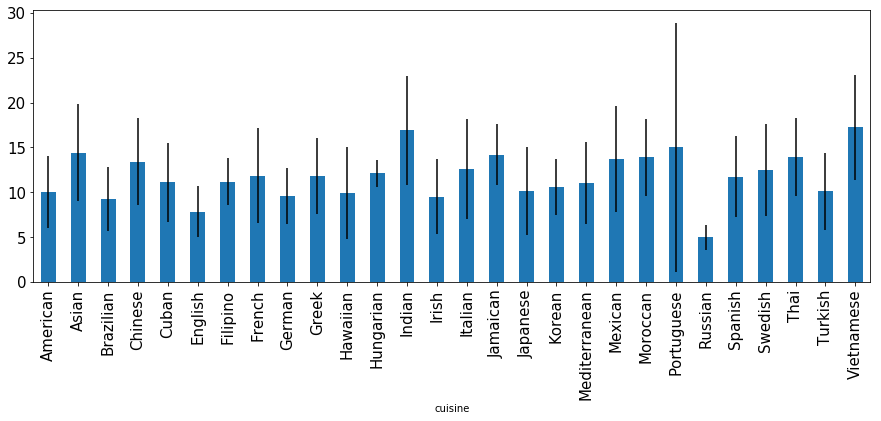

In [118]:
df.plot(figsize=(15,5),legend=False,kind="bar",rot=90,fontsize=15,x='cuisine',yerr='std')


In [245]:
# Set values for NN parameters
num_features = 1500    # Word vector dimensionality                      
min_word_count = 5    # 50% of the corpus                    
num_workers = 40       # Number of CPUs
context = 10       # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   # threshold for  
                      # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(train_data['ingredients_clean'], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [256]:
model.most_similar('pasta', topn=10)


[('spaghetti', 0.9069350957870483),
 ('pecorino', 0.8577872514724731),
 ('reggiano', 0.8482255935668945),
 ('ricotta', 0.8361855745315552),
 ('fettuccine', 0.8291971683502197),
 ('parmigianoreggiano', 0.8169500827789307),
 ('gnocchi', 0.8169223070144653),
 ('lasagna', 0.8138928413391113),
 ('curlyedged', 0.8138022422790527),
 ('meatball', 0.8063309192657471)]

In [154]:
model.similarity('cheese','pasta')


0.29308503120968471

In [253]:
x = 'pasta'
b = 'pork'
a = 'bacon'
predicted = model.most_similar([x, b], [a])[0][0]
print("{} is to {} as {} is to {} ".format(a, b, predicted, x ))

bacon is to pork as spaghetti is to pasta 


In [248]:
corpus = sorted(model.wv.vocab.keys()) 
emb_tuple = tuple([model[v] for v in corpus])
X = np.vstack(emb_tuple)


In [249]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [157]:
X_tsne.shape

(3498, 2)

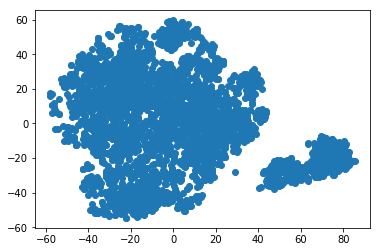

In [257]:
plt.pyplot.scatter(X_tsne[:, 0], X_tsne[:, 1])


In [161]:
cuisine2color = {
    'American': sns.xkcd_rgb["peach"],
    'Asian': sns.xkcd_rgb["powder blue"],
    'Italian': sns.xkcd_rgb["light pink"],
    'Greek': sns.xkcd_rgb["chocolate"],
    'Mediterranean': sns.xkcd_rgb["orange"],
    'Mexican': sns.xkcd_rgb["magenta"],
    'Thai': sns.xkcd_rgb["purple"],
    'Chinese': sns.xkcd_rgb["blue"],
    'Indian': sns.xkcd_rgb["deep blue"],
    'English': sns.xkcd_rgb["sky blue"],
    'Korean': sns.xkcd_rgb["olive"],
    'French': sns.xkcd_rgb["seafoam green"],
    'Vietnamese': sns.xkcd_rgb["tan"],
    'Hawaiian': sns.xkcd_rgb["mauve"],
    'Brazilian': sns.xkcd_rgb["hot pink"],
    'Filipino': sns.xkcd_rgb["pale green"],
    'Hungarian': sns.xkcd_rgb["indigo"],
    'Japanese': sns.xkcd_rgb["lavender"],
    'Turkish': sns.xkcd_rgb["eggplant"],
    'Spanish': sns.xkcd_rgb["brick"],
    'Russian': sns.xkcd_rgb["forest green"],
    'Irish': sns.xkcd_rgb["dark turquoise"],
    'Swedish': sns.xkcd_rgb["terracotta"],
    'Moroccan': sns.xkcd_rgb["mustard yellow"],
    'Cuban': sns.xkcd_rgb["raspberry"],
    'Jamaican': sns.xkcd_rgb["dark peach"],
    'German': sns.xkcd_rgb["bright yellow"],
    'Portuguese': sns.xkcd_rgb["earth"],

}

In [162]:
def ingredients_by_cuisine(cuisine_type):
    c = Counter()
    for word in train_data[train_data['cuisine']==cuisine_type]['ingredients_clean']:
        c.update(word)
    return c

In [163]:
def origin_cuisine(ingredient):
    record = 0
    mother_cuisine = None
    for cuisine in train_data['cuisine'].unique():
        if ingredients_by_cuisine(cuisine)[ingredient]/count_ingredients[ingredient]>record:
            record = ingredients_by_cuisine(cuisine)[ingredient]/count_ingredients[ingredient]
            mother_cuisine = cuisine
    return mother_cuisine

In [165]:
color_vector = list()
label_vector = list()
for ingredient in corpus:
    cuisine = origin_cuisine(ingredient)
    color_vector.append(cuisine2color[cuisine])
    label_vector.append(cuisine)

In [166]:
import plotly

In [167]:
from collections import defaultdict
keys = label_vector
values = list(X_tsne)
names = corpus
points_names = list(zip(values, names))
dic={}
for x,y in zip(points_names,keys):
    dic.setdefault(y,[]).append(x)

In [251]:
from operator import itemgetter
point_cuisine = zip(X_tsne, label_vector)
traces = []
group_points = []
n = len(dic.keys())
for key in dic.keys():
    group_points = list(map(itemgetter(0), dic[key])) 
    trace = go.Scatter(
        x = np.asarray(group_points)[:, 0],
        y = np.asarray(group_points)[:, 1],
        mode = 'markers',
        marker = dict(
            color = cuisine2color[key],
            size = 8,
            opacity = 0.6,
            #line = dict(width = 1)
        ),
        text = list(map(itemgetter(1), dic[key])),
        hoverinfo = 'text',
        name = key
)
    
    traces.append(trace)


layout = go.Layout(
    xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=False
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=False
    )
)
import plotly.offline as offline

fig = go.Figure(data=traces, layout=layout)

plotter = offline.plot
py.iplot(fig, filename='smt' + '.html') 
#py.iplot(traces, filename='basic-scatter')




# Next steps

Like we already mentioned throughout this notebook, we want to focus on upgrading our recommender with different options, which we plan to include by allowing some interactivity with our recommendation system. We want to allow our users to insert the number of calories they whant in their diet, to select the ingredients they would like to have in their menu. We want to provide recipes by cuisine, taste, courses, or preparation time. We want to explore recipe similarities. We will sort the dishes into according categories based on course type and match the needed nutritional requrements set by the user. For the visualization part, we will include photos of recipes which we have based on our json files. 